In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from nbody import Particles, NbodySimulation
import time

In [2]:
problem_name = "N_Body"

[-493.68275866  -51.11255907  202.16665181 ...  643.94725799 1198.52751254
  440.85683443]
[-1460.05715724  -467.09827586 -1441.25178345 ...   137.87849003
  -792.22251754 -1665.49387317]
[  961.8335539   -947.33482936 -1367.113171   ...  1057.36124058
   631.08404045 -1051.9727533 ]
Done!
total time:  18.511735916137695 s


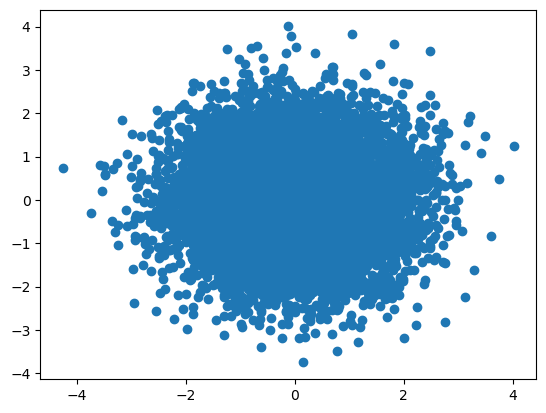

In [3]:
def initial_NormalDistribution(N):
    
    particles = Particles(N)
    np.random.seed(111022544)
    particles.set_positions(np.random.randn(N,3))
    pos = particles.get_positions()
    plt.scatter(pos[:,0], pos[:,1])
    np.random.seed(111022544)
    particles.set_velocities(np.random.randn(N,3))
    np.random.seed(111022544)
    particles.set_accelerations(np.random.randn(N,3))
    masses = particles.get_masses()
    #particles.set_masses(20/N*masses)
    
    return particles

t0 = time.time()
particles = initial_NormalDistribution(10000)
sim = NbodySimulation(particles)
sim.setup(G=1,rsoft=0.01,method="Euler",io_freq=60,io_title=problem_name,io_screen=True,visualized=False)
sol = sim.evolve(dt=0.01,tmax=0.01)
t1 = time.time()
print('total time: ',t1-t0, 's')


(-0.31311040748555297,
 0.40697091687691844,
 0.8979089358490038,
 1.6179902602114753)

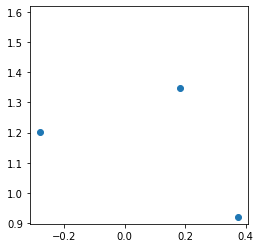

In [18]:
x = sol[:,0,0]
y = sol[:,1,0]

plt.scatter(x, y)
plt.axis('square')

(-10.308132289872079,
 10.171190018805843,
 1.4269478951561734,
 21.906270203834097)

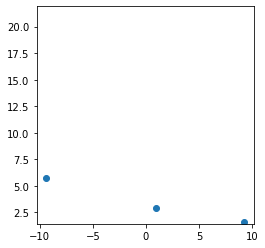

In [19]:
x = sol[:,0,200]
y = sol[:,1,200]

plt.scatter(x, y)
plt.axis('square')

(-32.66529048073727, 32.16362729426673, -1.0867236683955688, 63.74219410660843)

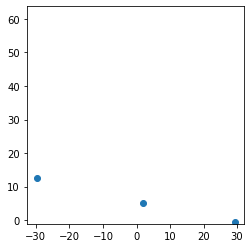

In [20]:
x = sol[:,0,400]
y = sol[:,1,400]

plt.scatter(x, y)
plt.axis('square')

In [21]:
import glob

In [22]:
fns = "data_"+problem_name+"/"+"data_"+problem_name+"*.txt"
fns = glob.glob(fns)
fns.sort()
#print(fns) 

loadtxt done data_N_Body/data_N_Body_00000.txt
loadtxt done data_N_Body/data_N_Body_00060.txt
loadtxt done data_N_Body/data_N_Body_00120.txt
loadtxt done data_N_Body/data_N_Body_00180.txt
loadtxt done data_N_Body/data_N_Body_00240.txt
loadtxt done data_N_Body/data_N_Body_00300.txt
loadtxt done data_N_Body/data_N_Body_00360.txt
loadtxt done data_N_Body/data_N_Body_00420.txt
loadtxt done data_N_Body/data_N_Body_00480.txt
loadtxt done data_N_Body/data_N_Body_00540.txt
loadtxt done data_N_Body/data_N_Body_00600.txt
loadtxt done data_N_Body/data_N_Body_00660.txt
loadtxt done data_N_Body/data_N_Body_00720.txt
loadtxt done data_N_Body/data_N_Body_00780.txt
loadtxt done data_N_Body/data_N_Body_00840.txt
loadtxt done data_N_Body/data_N_Body_00900.txt
loadtxt done data_N_Body/data_N_Body_00960.txt
loadtxt done data_N_Body/data_N_Body_01020.txt
loadtxt done data_N_Body/data_N_Body_01080.txt
loadtxt done data_N_Body/data_N_Body_01140.txt
loadtxt done data_N_Body/data_N_Body_01200.txt
loadtxt done 

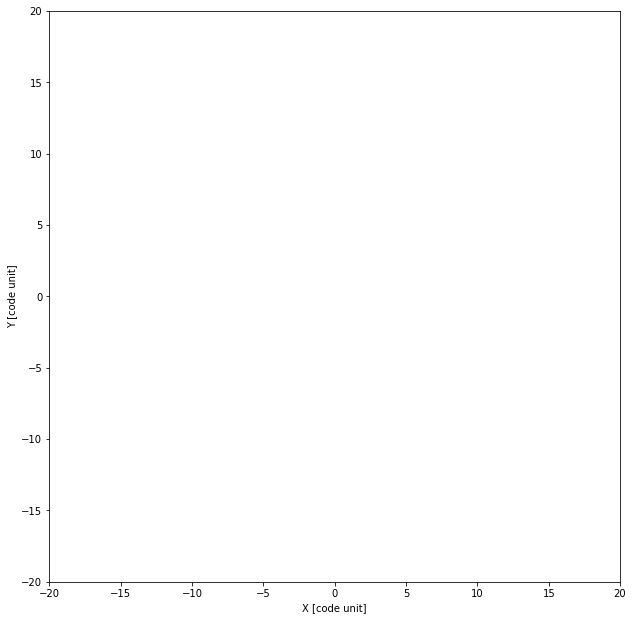

In [23]:
scale = 20

fig, ax =plt.subplots()
fig.set_size_inches(10.5, 10.5, forward=True)
fig.set_dpi(72)
line, = ax.plot([],[],'o')                   # plots of particles

def init():
    ax.set_xlim(-scale,scale)
    ax.set_ylim(-scale,scale)
    ax.set_aspect('equal')
    ax.set_xlabel('X [code unit]')
    ax.set_ylabel('Y [code unit]')
    return line,

def updateParticles(frame):
    fn = fns[frame]
    m,t,x,y,z,vx,vy,vz,ax,ay,az = np.loadtxt(fn)
    print("loadtxt done",fn)
    line.set_data(x,y)
    return line,

ani = animation.FuncAnimation(fig, updateParticles, frames=len(fns),init_func=init, blit=True)
#plt.show()
ani.save('movie_'+problem_name+'.mp4',fps=10)